In [1]:
import cv2
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import datasets
from skimage.feature import hog

Training & Fitting the Model

In [2]:
# Loading The Dataset

dataset = datasets.fetch_openml('mnist_784')

In [3]:
# Separating out the features & labels for fitting the ML model

features = np.array(dataset["data"],'int16')
labels = np.array(dataset["target"],'int')

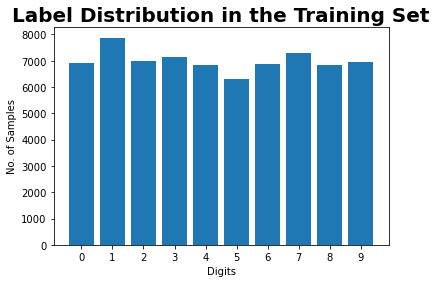

<Figure size 7500x7500 with 0 Axes>

In [4]:
# Visualisation of the training data set
# The distribution of labels for classification should be balanced for accurate predictions

digits, counts = np.unique(labels,return_counts=True)

chart = plt.bar(digits,counts)
plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.ylabel("No. of Samples")
plt.xlabel("Digits")
plt.title("Label Distribution in the Training Set",fontdict={'fontsize' : 20, 'fontweight' : 'bold'})
plt.figure(figsize=(25,25),edgecolor='red',dpi=300)
plt.show()

In [5]:
# Extracting the HOG features of the images in the training set for fitting into the model

hog_list = []
for feature in features:
    item = hog(feature.reshape(28,28),orientations=9,pixels_per_cell=(14,14),cells_per_block=(1,1),visualize=False)
    hog_list.append(item)
hog_description = np.array(hog_list,'float64')

In [6]:
# Fitting the training dataset into a Support Vector Classifier

svm = SVC(kernel='rbf')
svm.fit(hog_description,labels)

SVC()

In [7]:
# Storing the fitted model on the disk

#joblib.dump(svm,"digits_prediction_svm.pkl")

['digits_prediction_svm.pkl']

### Testing Our Model ###

In [12]:
# Loading back our model & Loading our test image for prediction

#svm = joblib.load("digits_prediction_svm.pkl")

image = cv2.imread("Test_Case8.jpg")
cv2.imshow("Test Image",image)
cv2.waitKey()

-1

In [13]:
# Pre-Processing of the test image to make it suitable for our ML model to make predictions accurately

gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
gray_image = cv2.GaussianBlur(gray_image, (5,5), 0)
thresh_return, image_thresh = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY_INV)

contours, cont_return = cv2.findContours(image_thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
rectangles = [cv2.boundingRect(cntr) for cntr in contours]

cv2.imshow("Image After Pre-Processing",image_thresh)
cv2.waitKey()

-1

In [14]:
for rect in rectangles:
    cv2.rectangle(image, (rect[0],rect[1]), (rect[0]+rect[2], rect[1]+rect[3]), (0,255,0), thickness=3)

    pred_image = image_thresh
    pred_image = cv2.resize(pred_image, (28,28), interpolation=cv2.INTER_AREA)
    pred_image = cv2.dilate(pred_image, (3,3))

    hog_pred = hog(pred_image, orientations=9, pixels_per_cell=(14,14), cells_per_block=(1,1), visualize=False)
    prediction = svm.predict(np.array([hog_pred], 'float64'))

    cv2.putText(image, str(int(prediction[0])), (rect[0],rect[1]), cv2.FONT_HERSHEY_DUPLEX, 2, (255,0,0), thickness=3)

cv2.imshow("Image with Digit Predictions", image)
cv2.waitKey()

-1